In [25]:
# Importacion Librerias

## Varables aleatorias discretas y continuas

import numpy as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import hypergeom

### 1. Distribución binomial (Distribucion de Probabilidad Discreta) Se usa cuando se conoce una proporcion considerada exito

### Una distribución binomial es una distribución de probabilidad discreta que describe el número de éxitos al realizar n experimentos independientes entre sí, acerca de una variable aleatoria. 

https://economipedia.com/definiciones/distribucion-binomial.html

Un fabricante en California le suministra un diseño prototipo para una pieza de aeronave que requeire su negocio. Este uevo producto, que es enviado en lotes de n =12, sufre una tasa de defectos del 40%  A. Si usted no desea un riesgo mayor al 10% en la probabilidad de que 5 de los 12 sean defectuosos. ¿Deberia comprale a ese distribuidoe? B. Si usted no desea enfrentar un riesgo mayor del 20% de probabildiad de que mas de 5 salgan defectuosos. ¿Deberia comprarle a ese distribuidor?


In [26]:
n_lotes = 12 ## Numero de lotes de prototipos de aeronaves tomados como muestra
pi_lotes = 0.4 ## Porcentaje en la tasa de defectos de los lotes

In [27]:
## El problema dado se puede resolver usando una distribucion de probabilidad binomial
distr_bin_lotes = ss.binom(n_lotes,pi_lotes)

C:\Users\ViG\AppData\Local\Temp\ipykernel_10344\2693049159.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_binom,


[Text(0.5, 0, 'Valores'), Text(0, 0.5, 'Frequency')]

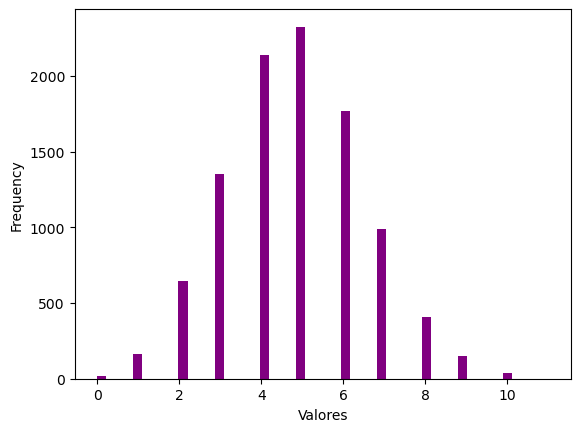

In [28]:
## Se grafica la distribucion segun los datos anteriores

data_binom =ss.binom.rvs(n=n_lotes, p=pi_lotes,size=10000)

ax = sns.distplot(data_binom,
                 kde = False,
                 color = "purple",
                  hist_kws={"linewidth" : 15, 'alpha':1})
ax.set(xlabel = "Valores" , ylabel = 'Frequency')                  

### A. Si usted no desea un riesgo mayor al 10% en la probabilidad de que 5 de los 12 sean defectuosos. ¿Deberia comprale a ese distribuidoe? R/ No deberia comprarle, ya que la probabilidad anda en un 20% de que salgan deffectuosas 

R/ La probabilidad es mayor al riesgo del 10% por lo cual no es recomendable realizar dicha compra

In [29]:
## Otra manera de resolverlo sin involucrar graficos

x_lotes_a = 5  #Numero de lotes defectuosos a evaluar

## Se usa la funcion pmf para determinar la probabilidad

prob_lotes_a = distr_bin_lotes.pmf(x_lotes_a)
prob_lotes_a

0.22703033548800008

### B. Si usted no desea enfrentar un riesgo mayor del 20% de probabildiad de que mas de 5 salgan defectuosos. ¿Deberia comprarle a ese distribuidor? 
R/ La probabilidad es mayor al riesgo del 20% por lo cual no es recomendable realizar dicha compra

In [30]:
x_lotes_b = 5  #Numero de lotes defectuosos a evaluar

## Se usa la funcion cdf para determinar la probabilidad, distribucion acumulada 

prob_lotes_b = 1- distr_bin_lotes.cdf(x_lotes_b)
prob_lotes_b

0.3347914424319999

### 2. Distribucion Hipergeometrica (Distribucion discreta, tiene un parametro extra , tiene una poblacion total y una poblacion de muestra (un subconjunto))

### La distribución hipergeométrica es una distribución discreta que modela el número de eventos en una muestra de tamaño fijo cuando usted conoce el número total de elementos en la población de la cual proviene la muestra.

https://support.minitab.com/es-mx/minitab/21/help-and-how-to/probability-distributions-random-data-and-resampling-analyses/supporting-topics/distributions/hypergeometric-distribution/

Una tienda de productos deportivos tiene en existencia N=20 pares de botas para esquiar de las cuales r=8 son de su talla. Si usted selecciona n=3 pares que usted desea, ¿Cual es la probabildiad de que X = 1 le quede bien?

In [31]:
N_botas = 20 # Poblacion total de pares de botas para esquiar
r_botas = 8 # Numero de botas de nuestra talla
n_botas = 3 # Numero de pares de botas seleccionado para la muestra

distr_hyper_botas = ss.hypergeom.rvs(N_botas, r_botas, n_botas)

C:\Users\ViG\AppData\Local\Temp\ipykernel_10344\3426741871.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_hyper,


[Text(0.5, 0, 'Valores'), Text(0, 0.5, 'Frequency')]

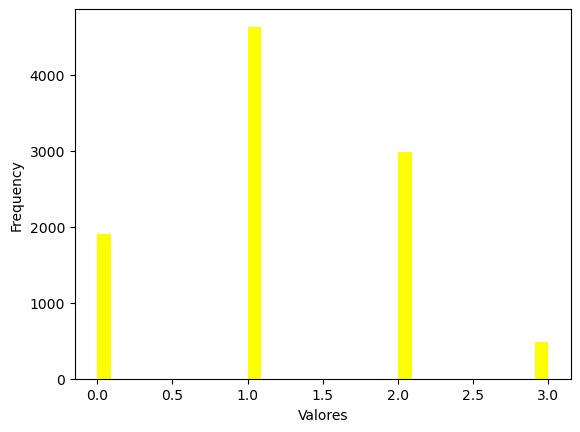

In [32]:
## Se grafica la distribucion segun los datos anteriores

data_hyper = ss.hypergeom.rvs(N_botas, r_botas, n_botas, size =10000)

ax = sns.distplot(data_hyper,
                kde = False,
                color = 'yellow',
                hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel ='Valores', ylabel = 'Frequency')

In [33]:
## La probabilidad de que me queden 1 un par es del 50$, que me queden los 3 pares es menor al 10%

In [34]:
## Comprobacion matematica

# Parámetros de la distribución hipergeométrica

N = 20  # Tamaño de la población
K = 8  # Número total de elementos exitosos en la población
n = 3   # Tamaño de la muestra

# Crear una instancia de la distribución hipergeométrica
distr_hyper_botas = hypergeom(N, K, n)

x_botas = 1 # Numero de pares de botas seleccionado para la evaluacion

prob_botas = distr_hyper_botas.pmf(x_botas) #pmf es un valor especifico 
prob_botas

0.46315789473684216

### 3. Distribucion de Poisson

###  Poisson es una distribución de probabilidad discreta que se aplica a las ocurrencias de algún evento durante un periodo determinado. Es decir, es una distribución de probabilidad discreta en la que solo es necesario conocer los eventos y cuál es su frecuencia media de ocurrencia para poder conocer la probabilidad de que ocurran. 

https://www.sdelsol.com/blog/tendencias/distribucion-de-poisson/

El cable utilizado para asegurar las estructuras de los puentes tiene un promedio de 3 defectos por cada 100 yardas. Si usted bbecesita 50 yardas, ¿Cual es el la probabilidad de que haya una defectuosa?

In [35]:
mu_yardas = (3/100) # Numero de promedio de defectos por cada unidad de yardas
n_yardas = 50 # Numero de Yardas del cable a tener en cuenta

mu_yardas_cable = (mu_yardas * n_yardas)
distr=poi_yardas = ss.poisson(mu_yardas_cable)

C:\Users\ViG\AppData\Local\Temp\ipykernel_10344\1690089217.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_poiss,


[Text(0.5, 0, 'Valores'), Text(0, 0.5, 'Frequency')]

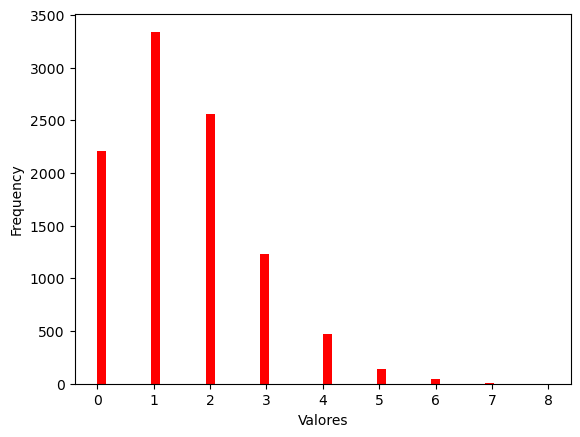

In [36]:
data_poiss = ss.poisson.rvs(mu_yardas_cable,size = 10000)

ax = sns.distplot(data_poiss,
                 kde = False,
                 color ='red',
                 hist_kws={"linewidth" : 15, 'alpha' :1})
ax.set(xlabel = 'Valores', ylabel ='Frequency')

In [37]:
## Segun el grafico no se encontraran mas de 8 defectos de cada 100

## Casi un 40% para que haya 1 defectuosa

# ¿Cual es la probabilidad de que haya una defectuosa?

n_yardas = 50 # Numero de Yardas del cable a tener en cuenta
x_cables = 1 # Numero de cables tomados para evaluar si estan defectuosos

In [38]:
prob_yardas = distr=poi_yardas.pmf(x_cables)
prob_yardas

0.33469524022264474

### 4. Distribucion Exponencial (Es continua)

### Se refiere a la cantidad de tiempo que transcurre hasta que se produce algún evento específico. Por ejemplo, la cantidad de tiempo (que comienza ahora) hasta que se produzca un terremoto tiene una distribución exponencial.

https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica-empresarial/pages/5-3-la-distribucion-exponencial

Como Gerente de Burguer Heaven, usted observa que los clientes entran a su establecimiento a razon de 8 por hora. ¿Cual es la probabilidad de que pasen mas de 15 minutos entre la llegada de dos clientes?



In [39]:
mu_exp = (60/8) # Tasa promedio de entradas de los clientes al establecimientos por  minuto

C:\Users\ViG\AppData\Local\Temp\ipykernel_10344\4182644035.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_exp,


[Text(0.5, 0, 'Valores'), Text(0, 0.5, 'Frequency')]

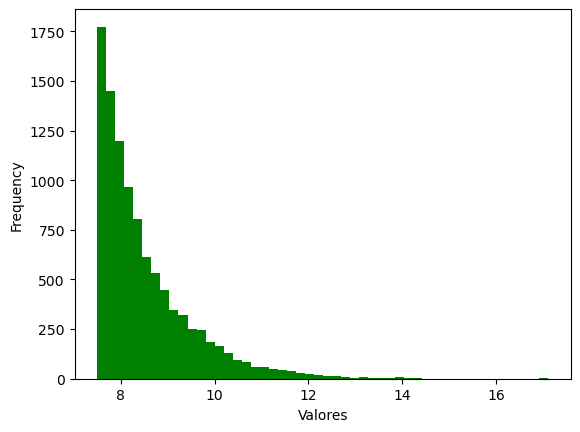

In [40]:
data_exp = ss.expon.rvs(mu_exp,size=10000)

ax = sns.distplot(data_exp,
                 kde = False,
                 color = 'green',
                 hist_kws={"linewidth" : 15, 'alpha':1})
ax.set(xlabel = 'Valores', ylabel ='Frequency')

In [41]:
## La probabilidad se mide del umero 15 hacia la derecha, que muestra que es menor a 20% exactamente un 0.13%. (13%)

¿Cual es la probabildidad de que pasen mas de 15 minutos entre la llegada de dos clientes?

x_exp = 15 # Minutos a evaluar entre la entrada de 2 clientes

prob_exp = 1 - ss.expon.cdf(x_exp, loc=0, scale=mu_exp)
prob_exp

Object `clientes` not found.


0.1353352832366127

### 5. Disitribucion Uniforme (Determinar probabilidades)(Continua)

### Es una distribución de probabilidad continua y se refiere a eventos que tienen la misma probabilidad de ocurrir. Cuando se resuelven problemas que tienen una distribución uniforme, hay que tener en cuenta si los datos son inclusivos o excluyentes de los extremos.

https://openstax.org/books/introducci%C3%B3n-estad%C3%ADstica-empresarial/pages/5-2-la-distribucion-uniforme

Los tiempos de terminacion de un trabajo oscilan entre 10.2 minutos a 18.3 minutos y se piensan que estan distribuidos uniformemente. ¿Cual es la probabilidad de que se requeiere entre 12.7 y 14.5 minutos para realizar este trabajo?


In [42]:
a_unif =10.2 # Tiempo minimo de terminacion de un trabajo
b_unif = 18.3 # Tiempo maximo de terminacion de un trabajo
rango_unif = b_unif - a_unif # Rango de oscilacion de la terminacion de los trabajos general

distr_unif_trabajos = ss.uniform(a_unif, rango_unif)

C:\Users\ViG\AppData\Local\Temp\ipykernel_10344\2637892179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_unif,


[Text(0.5, 0, 'Valores'), Text(0, 0.5, 'Frequency')]

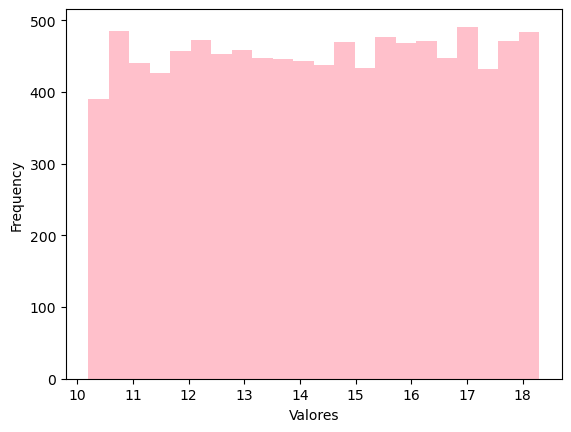

In [43]:
data_unif = ss.uniform.rvs(a_unif, rango_unif, size=10000)

ax = sns.distplot(data_unif,
                 kde = False,
                  color ='pink',
                  hist_kws={"linewidth" :15, 'alpha' :1})
ax.set(xlabel ='Valores', ylabel ='Frequency')

In [44]:
# ¿Cual es la probabilidad de que se requiera entre 12.7 y 14.5 minutos para realizar este trabajo?

a_trabajo = 12.7 # Tiempo minimo a evaluar de la terminacion de un trabajo
b_trabajo = 14.5 # Tiempo maximo a evaluar de la terminacion de un trabajo
rango_trabajo = a_trabajo -b_trabajo # Rango de la oscilacion de la terminacion de los trabajos a evaluar

prob_unif = distr = distr_unif_trabajos.cdf(b_trabajo) - distr_unif_trabajos.cdf(a_trabajo)
prob_unif

0.22222222222222232

### 6. Distribucion normal (Continua)

### La distribución normal (en ocasiones llamada distribución gaussiana) es la distribución continua que se utiliza más comúnmente en estadística, es un modelo que aproxima el valor de una variable aleatoria a una situación ideal, dependiendo de la media y la desviación típica.

https://www.gestiopolis.com/que-es-la-distribucion-normal/

El ministerio de agricultura de Estados Unidos en un estudio sobre cultivos ha detectado que las precipitaciones diarias en ciertos lugares de Hawai parecen estar distribuidas normalmente con una media de 2.2 pulgadas durante la estacion lluviosa. Se determino que la desviacion estandar era de 0.8 pulgadas. A. ¿Cual es la probabilidad de que llueva mas de 3.3 pulgadas en un dia durante la estacion lluviosa?. B. Encuentre la probabilidad de que llueva mas de1.3 pulgadas? C. ¿Cual es la probabilidad de que las precipicataciones esten entre 2.7 y 3.0 pulgadas?. D.¿Cuanta precipitacion debe presentarse para exceder el 10% de las precipitaciones diarias?

In [45]:
mu_precip = 2.2 # Valor promedio de pulgadas que se precipitan diariamente
rho_precip = 0.8 #Desviacion estandar de pulgadas que se precipitan diariamente

distr_norm_precip = ss.norm(mu_precip, rho_precip)

C:\Users\ViG\AppData\Local\Temp\ipykernel_10344\1693767148.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data_norm,


[Text(0.5, 0, 'Valores'), Text(0, 0.5, 'Frequency')]

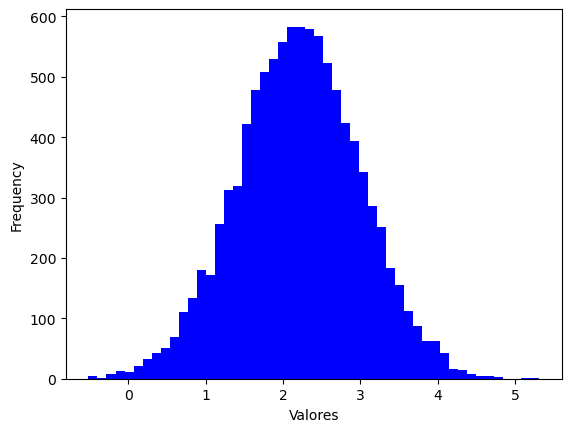

In [47]:
data_norm = ss.norm.rvs(mu_precip,rho_precip,size=10000)

ax = sns.distplot(data_norm,
                kde = False,
                color = 'blue',
                hist_kws={"linewidth": 15, 'alpha':1})
ax.set(xlabel = 'Valores', ylabel = 'Frequency')
         

In [49]:
# A.¿Cual es ña probabilidad de que llueva mas de 3.3 pulgadas en un dia durante la estacion lluviosa?

x_precip_a = 3.3 # Pulgadas precipitadas a evaluar

prob_precip_a = 1 - distr_norm_precip.cdf(3.3)
prob_precip_a

0.08456572235133575

In [50]:
#B. Encuentre la probabilidad de que llueva mas de 1.3 pulgadas

x_precip_b = 1.3 #pulgadas precipatadas a evaluar

prob_precip_b = 1 - distr_norm_precip.cdf(1.3)
prob_precip_b

0.8697054828631912

In [51]:
# C. ¿Cual es la probabilidad de que las precipitaciones esten entre 2.7 y 3.0 pulgadas?

x1_precip_c = 2.7 #Pulgadas minimas precipitaciones a evaluar
x2_precip_c = 3 # Pulgadas maximas precipitaciones a evaluar

prob_precip_c = distr_norm_precip.cdf(3) - distr_norm_precip.cdf(2.7)
prob_precip_c

0.10733027511724347

In [53]:
# D. ¿Cuanta precipitacion debe presentarse para exceder el 10% de las precipitaciones diarias?

prob_precip_d = 0.1 #Probabilidad de que ocurran 'X' numero de precipitaciones diarias

distr_norm_precip.ppf(0.1)


1.1747587475643197